# Data Science - Unit 1 Sprint 3 Module 1

## Module Project: Inference for Linear Regression

### Learning Objectives

* identify the appropriate hypotheses to test for a statistically significant relationship between two quantitative variables
* conduct and interpret a t-test for the slope parameter
* identify the appropriate parts of the output of a linear regression model and use them to build a confidence interval for the slope term.
* make the connection between the t-test for a population mean and a t-test for a slope coefficient.
* identify violations of the assumptions for linear regression

### Total notebook points: 16

## Introduction

### Statistical significance between head size and brain weight in healthy adult humans

The `Brainhead.csv` dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. 

The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed).

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.


**Use the above information to complete Tasks 1 - 10.**



Recall from the Module 1 Project that we were working with the brain weight variable (`Brain`) and the head size (`Head`) variables. We identified the dependent and independent variables, plotted our variables on the appropriate axes, and then described the strength of the relationship.

* `Brain` (brain weight in g) - **dependent** variable (y)
* `Head` (the head size in cubic cm - **independent** variable (x)

Now, we're going to bring back some statistics from Sprint 2 and look at the statistical association between head size and brain weight.



**Task 1** - Statistical tests

What type of statistical test will we use to determine if there is a statistically significant association between head size and brain weight in the population?  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: A beta test

B: A chi-square test

C: A Bayesian test

D: A t-test


In [24]:
# Task 1

# YOUR CODE HERE
Answer = 'D'


**Task 1 Test**

In [25]:
# Task 1 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 2** - Hypotheses for linear regression

Select the null and alternative hypotheses you would use to test for a statistically significant association between head size and brain weight.  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: $H_0: \beta_1 = 0$ vs. $H_a: \beta_1 \neq 0$

B: A$H_0: \beta_0 = 0$ vs. $H_a: \beta_0 \neq 0$

C: $H_0: \beta_1 \neq 0$ vs. $H_a: \beta_1 = 0$

D: $H_0: \beta_0 = \beta_1 $ vs. $H_a: \beta_0 \neq \beta_1$


In [26]:
# Task 2

# YOUR CODE HERE
Answer = 'A'


**Task 2 Test**

In [27]:
# Task 2 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 3** - Load the data

As we usually begin, let's load the data! The URL has been provided.

* load your CSV file into a DataFrame named `df`

In [28]:
# Task 3

# Imports
import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

# YOUR CODE HERE
df = pd.read_csv(data_url)

# Print out your DataFrame
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


**Task 3 Test** 

In [29]:
# Task 3 - Test

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 237


**Task 4** - Fit OLS model

Now, we're going to fit a regression model to our two variables. We're going to use `statsmodels.formula.api` and import the `ols` model. This import has been provided for you.

* Fit a model and name your variable `model`
* Using the `model.params[1]` method, assign the slope to the variable `slope`. Your variable should be a float (`numpy.float64`).
* Using the same `model.params[0]` method, assign the intercept to the variable `intercept`. Your variable should be a float (`numpy.float64`).
* Print out your model summary.

*Hint: Make sure to use the format Y ~ X for the model input.*

In [30]:
# Task 4

# Import statsmodels - DON'T Delete
from statsmodels.formula.api import ols

# Set-up and fit the model in one step
# (format Y ~ X)

# YOUR CODE HERE
model = ols("Brain ~ Head", data= df).fit()
slope = model.params[1]
intercept = model.params[0]
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           5.96e-54
Time:                        19:22:24   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

**Task 4 - Test**

In [31]:
# Task 4 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 5** - Formulate the statistical model

Using the model parameters returned above, you will now write out the statistical model as a linear equation. Remember, we are predicting brain weight from head size.

* write your equation in Python
    * assign the dependent variable to `y_hat`
    * assign the independent variable to `x` with a value of `4000`
    * use the variables you created earlier for the slope and intercept

In [32]:
# Task 5

# YOUR CODE HERE
x = 4000

y_hat = intercept + slope*x
print(y_hat)

1379.2907790070387


**Task 5 - Test**

In [33]:
# Task 5 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 6** - Statistical parameters

Now that we have fit a model, we're going to pull out the statistical parameters.

* assign the standard error to the variable `std_err`
* assign the value of the t-statistics to the variable `t_stat`
* assign the p-value for the slope to the variable `p_slope`

**Assign values out to the 1/1000 place (for example, `777.555`)**

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           5.96e-54
Time:                        19:22:24   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

In [35]:
# Task 6

# YOUR CODE HERE
std_err = 0.013
t_stat = 20.409
p_slope = 0.000

**Task 6 - Test**

In [36]:
# Task 6 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 7** - Hypothesis Test

Conduct your hypothesis test and select the answer below that best describes the conclusion at the 0.05 significance level.  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: We reject the null hypothesis and conclude there is no association between head size and brain weight.

B: We reject the null hypothesis and conclude there is an association between head size and brain weight.

C: We fail to reject the null hypothesis and conclude there is no association between head size and brain weight.

D: We fail to reject the null hypothesis and conclude there is an association between head size and brain weight.


In [37]:
# Task 7

# YOUR CODE HERE
Answer = 'B'


**Task 7 Test**

In [38]:
# Task 7 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Hypothesis Test for the intercept

Conduct a hypothesis test for the intercept and select the answer below that best describes the conclusion at the 0.05 significance level.  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: We reject the null hypothesis and conclude there is no association between head size and brain weight.

B: We fail to reject the null hypothesis and conclude there is no association between head size and brain weight.

C: It does not make sense to interpret or conduct a hypothesis test for the intercept because 0 is not a value of x in our dataset.

D: It does not make sense to interpret or conduct a hypothesis test for the intercept because the slope is statistically significant.


In [39]:
# Task 8

# YOUR CODE HERE
Answer  = 'C'


**Task 8 Test**

In [40]:
# Task 8 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 9** - Confidence Interval

Calculate the 95% confidence interval for your slope term. Use your model summary to find these values. Assign them values out to the 1/1000 place (for example, `ci_low = 0.345`)

* assign the lower value of brain size to `brain_low`
* assign the upper value of brain size to `brain_upper`


In [41]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           5.96e-54
Time:                        19:22:24   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

In [42]:
# Task 9

# YOUR CODE HERE
brain_low = 0.238
brain_upper = 0.289

**Task 9 - Test**

In [43]:
# Task 9 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 10** - Plot confidence intervals

Plot the confidence limits on both the slope and intercept terms with a shaded area around our regression line. The easiest way to do this is using `seaborn` with the `ci` parameter set to the confidence level you want (the default is `ci=95`). This plot will not be autograded.

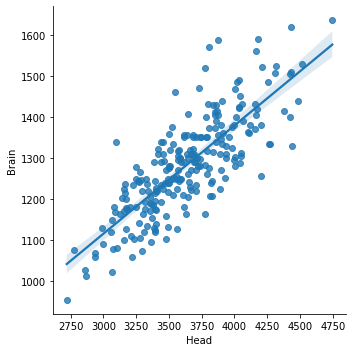

In [46]:
# Task 10
import seaborn as sns
# YOUR CODE HERE
sns.lmplot(x= 'Head', y= 'Brain', data= df, ci= 95 )

**Task 10** - Correlation (short answer)

Does it seem plausible that larger head size causes greater brain weight?  Or is it possible that something else causes differences in both of those factors?

ANSWER:  It does seem plausible that larger head size causes greater brain weight.



## Part B

### Sleep Data

Use the following information to answer Tasks 11 - 18 in the rest of this project:

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables for a selection of mammal species. This data is available in the Sleep.csv dataset; the URL is provided below. 

(*Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.*)

**Data Dictionary:**

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



**Task 11**

Before we can look at the data, we need to load in the data. The URL has been provided.

* load in the CSV file as a DataFrame and assign it to the variable `df_sleep`
* make sure to view the DataFrame!

In [47]:
# Task 11

data_url_2 = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

# YOUR CODE HERE
df_sleep = pd.read_csv(data_url_2)

# Print out your DataFrame
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


**Task 11 - Test**

In [48]:
# Task 11 - Test

assert isinstance(df_sleep, pd.DataFrame), 'Have you created a DataFrame named `df_sleep`?'
assert len(df_sleep) == 42


**Task 12** - Plot to check for linearity

Plot the relationship between *gestation time* and time spent in *dreaming sleep*. This plot will not be autograded.

* you can use `seaborn` for your plot, with the `regplot()` or `lmplot()`
* include the regression line but turn off the confidence interval (`ci=None`)

Select the answer that best describes the relationship between gestation time and time spent in dreaming sleep. Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: Gestation time and time spent in dreaming sleep appear to have a linear relationship.  The linear regression line shown in the figure seems to fit the data well.

B: Gestation time and time spent in dreaming sleep appear to have a non-linear relationship.  The linear regression line shown in the figure does not seem to fit the data well.

C: Gestation time and time spent in dreaming sleep appear to have no relationship.  The linear regression line shown in the figure seems to fit the data well.

D: Gestation time and time spent in dreaming sleep appear to have a linear relationship.  The linear regression line shown in the figure does not seem to fit the data well.

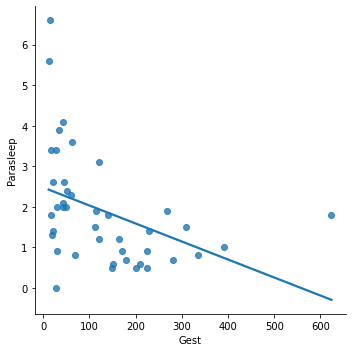

In [49]:
import seaborn as sns

sns.lmplot(x= 'Gest', y= 'Parasleep', data= df_sleep, ci=None)


In [51]:
# Task 12

# YOUR CODE HERE
Answer = 'B'

**Task 12 Test**

In [52]:
# Task 12 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 13** - Transform a variable

Let's try something new: taking the log of a variable to transform it. Then we'll look at the relationship between the log of that variable and the other variable (which will remain the same)

* Create a new variable with the log of gestational time and add it as a column to `df_sleep` with the name `log_gest` 

*Hint: use the natural log `np.log()`*

In [56]:
# Task 13
import numpy as np

# YOUR CODE HERE
df_sleep['log_gest'] = np.log(df_sleep['Gest'])

# Look at your new column
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,log_gest
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,3.737670
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,6.436150
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,5.192957
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,3.555348
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.971262


**Task 13 - Test**

In [57]:
# Task 13 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 14** - Plot a new relationship

Plot the relationship between *log of gestation time* and time spent in *dreaming sleep*. This plot will not be autograded.

* you can use `seaborn` for your plot, with the `regplot()` or `lmplot()`
* include the regression line but turn off the confidence interval (`ci=None`)

Select the answer that best describes the relationship between the log of gestation time and time spent in dreaming sleep. Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: The log of gestation time and time spent in dreaming sleep appear to have a linear relationship.  The linear regression line shown in the figure seems to fit the data well.

B: The log of gestation time and time spent in dreaming sleep appear to have a non-linear relationship.  The linear regression line shown in the figure does not seem to fit the data well.

C: The log of gestation time and time spent in dreaming sleep appear to have no relationship.  The linear regression line shown in the figure seems to fit the data well.

D: The log of gestation time and time spent in dreaming sleep appear to have a linear relationship.  The linear regression line shown in the figure does not seem to fit the data well.

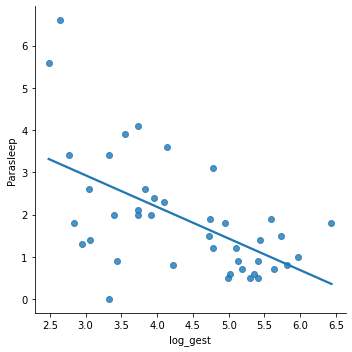

In [58]:
import seaborn as sns
sns.lmplot(x='log_gest', y='Parasleep', data=df_sleep, ci=None)

In [ ]:
# Task 14

# YOUR CODE HERE
Answere = 'A'

**Task 14 Test**

In [59]:
# Task 14 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 15** - Model the sleep data

Next, create a model of the relationship between the log of gestation time and dreaming sleep using the `statsmodels.formula.api`. Remember that the `statsmodels` import was made earlier.

* Fit a OLS model and assign it to the variable `model_sleep` (remember to enter the model in the format Y ~ X).
* Print out your model summary.
* Answer the questions below to interpret your results.

In [64]:
# Task 15
from statsmodels.formula.api import ols

# YOUR CODE HERE
model_sleep = ols("Parasleep ~ log_gest", data=df_sleep).fit()

# Print the model summary
print(model_sleep.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     19.49
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           7.48e-05
Time:                        20:01:35   Log-Likelihood:                -64.550
No. Observations:                  42   AIC:                             133.1
Df Residuals:                      40   BIC:                             136.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1762      0.763      6.782      0.0

**Task 15 Test**

In [65]:
# Task 15 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 16** - Statistical significance of sleep data (short answer)

Is the *log of gestational time* statistically significantly associated with time spent in *dreaming sleep* at the alpha = 0.05 level?

ANSWER:  The *log of gestational time* is statistically significantly associated with time spent in *dreaming sleep* at the alpha = 0.05 level.

**Task 17** - Predicting dreaming sleep from gestation time

The final task! Using the model we just created, predict the amount of dreaming sleep for a mammal that gestates her young for 262 days (this is the gestation time).

* Assign the gestation time to the variable `x_predict`. This variable will be an integer.
* Take the log of `x_predict` and assign it to the variable `ln_x_predict`. THis variable will be a float.
* Use the `slope` and `intercept` variables from your `model_sleep` to complete the calculation. 
* Your result should be a float and assigned to the variable `sleep_predict`.

In [66]:
# Task 17

# YOUR CODE HERE
x_predict = 262

ln_x_predict = np.log(x_predict)

slope_sleep = model.params[1]
intercept_sleep = model.params[0]

sleep_predict = intercept_sleep + slope_sleep*x_predict

# Print out the log of x and the predicted sleep value
print('ln 262 = ', ln_x_predict)
print('Predicted dreaming sleep = ', sleep_predict)

ln 262 =  5.568344503761097
Predicted dreaming sleep =  394.5919079956646


**Task 17 Test**

In [67]:
# Task 16

assert ln_x_predict == np.log(x_predict), 'Did you use the correct log calculation?'

